# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

dff45efb4cc070eab252244deeb14d38


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    response = requests.get(city_url)

    response_json = response.json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | dubrovnik
Processing Record 3 of Set 1 | ipixuna
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | malanje
Processing Record 7 of Set 1 | olinda
Processing Record 8 of Set 1 | tidore
City not found. Skipping...
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | mizan teferi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | onega
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | port hueneme
Processing Record 2

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,22.2855,114.1577,21.08,86,95,1.79,HK,1675647602
1,dubrovnik,42.6481,18.0922,0.80,29,0,16.98,HR,1675648180
2,ipixuna,-1.7625,-48.8043,22.74,97,98,1.22,BR,1675648181
3,tasiilaq,65.6145,-37.6368,-3.91,94,100,2.44,GL,1675648096
4,kapaa,22.0752,-159.3190,26.18,81,100,4.12,US,1675648181


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victoria,22.2855,114.1577,21.08,86,95,1.79,HK,1675647602
1,dubrovnik,42.6481,18.0922,0.80,29,0,16.98,HR,1675648180
2,ipixuna,-1.7625,-48.8043,22.74,97,98,1.22,BR,1675648181
3,tasiilaq,65.6145,-37.6368,-3.91,94,100,2.44,GL,1675648096
4,kapaa,22.0752,-159.3190,26.18,81,100,4.12,US,1675648181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

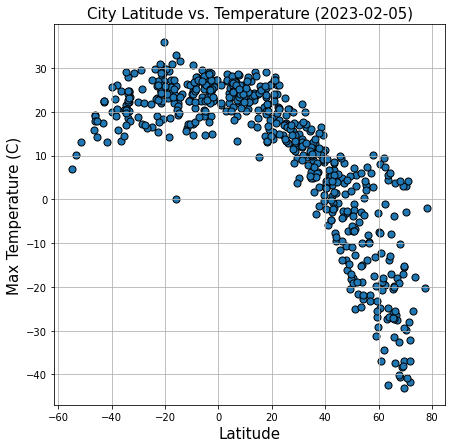

In [86]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter' , x='Lat' , y='Max Temp', grid=True,
                  edgecolors='black', s=50 ,figsize=(7,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Max Temperature (C)' ,fontsize=15)
plt.title('City Latitude vs. Temperature (2023-02-05)', fontsize=15)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

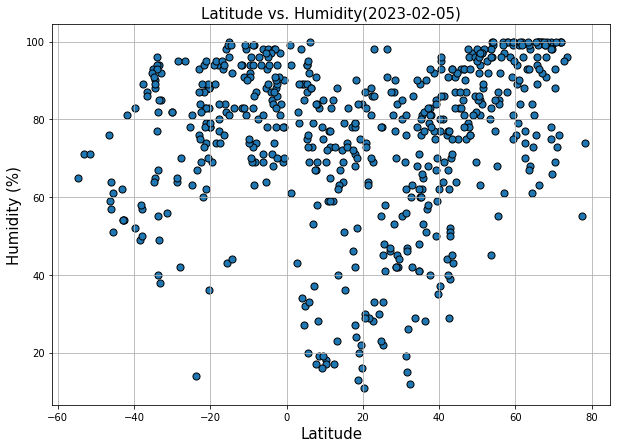

In [89]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter' , x='Lat' , y='Humidity', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
plt.title('Latitude vs. Humidity(2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

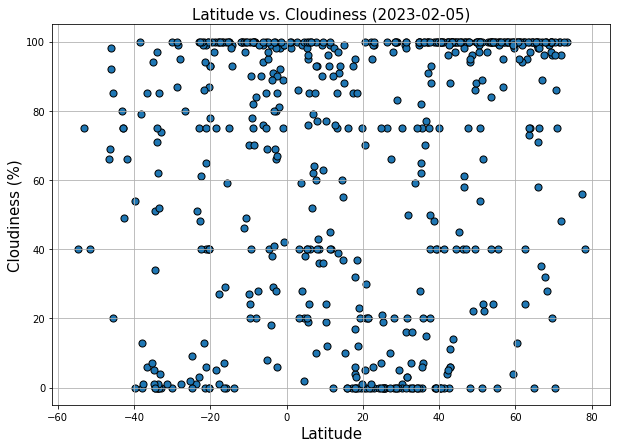

In [93]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter' , x='Lat' , y='Cloudiness', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
plt.title('Latitude vs. Cloudiness (2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

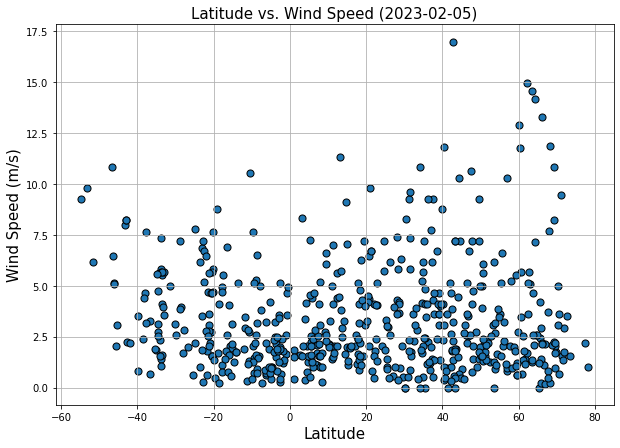

In [90]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter' , x='Lat' , y='Wind Speed', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (m/s)', fontsize=15)
plt.title('Latitude vs. Wind Speed (2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [158]:
# Define a function to create Linear Regression plots
def regression(dataframe , x_value , y_value):
    slope, int, r_squared, p_value, std_err = linregress(dataframe[x_value] , dataframe[y_value])
    regress_values = slope * dataframe[x_value] + int
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
    print(f'The r-value is: {r_squared}')
    print(f'Line Equation: {line_eq}')
    dataframe.plot(kind='scatter' , x=x_value , y=y_value, grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))
    plt.plot(dataframe[x_value], regress_values, 'r-')
    #plt.annotate(line_eq,(-50 , 20),fontsize=15,color="red")
    plt.xlabel('Latitude', fontsize=15)
    plt.ylabel(y_value, fontsize=15) 
    plt.title( f'{y_value} vs. Latitude' , fontsize=15)
    plt.show


In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victoria,22.2855,114.1577,21.08,86,95,1.79,HK,1675647602
1,dubrovnik,42.6481,18.0922,0.80,29,0,16.98,HR,1675648180
3,tasiilaq,65.6145,-37.6368,-3.91,94,100,2.44,GL,1675648096
4,kapaa,22.0752,-159.3190,26.18,81,100,4.12,US,1675648181
10,pevek,69.7008,170.3133,-37.02,99,96,1.73,RU,1675648182


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ipixuna,-1.7625,-48.8043,22.74,97,98,1.22,BR,1675648181
5,malanje,-9.5402,16.3410,17.11,92,100,1.43,AO,1675648181
6,olinda,-8.0089,-34.8553,27.85,74,20,1.54,BR,1675647745
7,cidreira,-30.1811,-50.2056,22.29,82,100,3.11,BR,1675648182
8,hermanus,-34.4187,19.2345,21.56,88,34,5.62,ZA,1675648182


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8739100415051273
Line Equation: y = -0.77x + 33.64


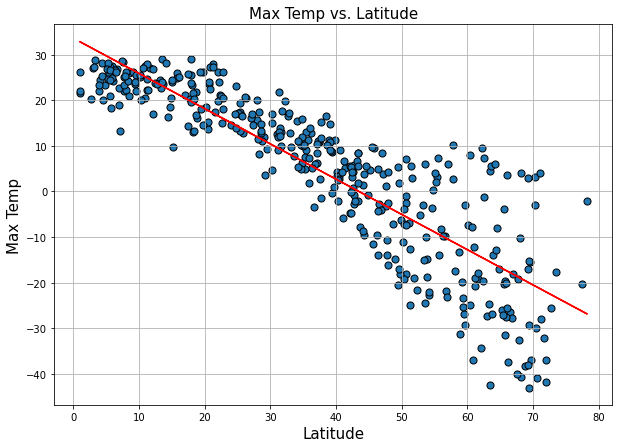

In [159]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Max Temp')


The r-value is: 0.34766227044901077
Line Equation: y = 0.13x + 25.4


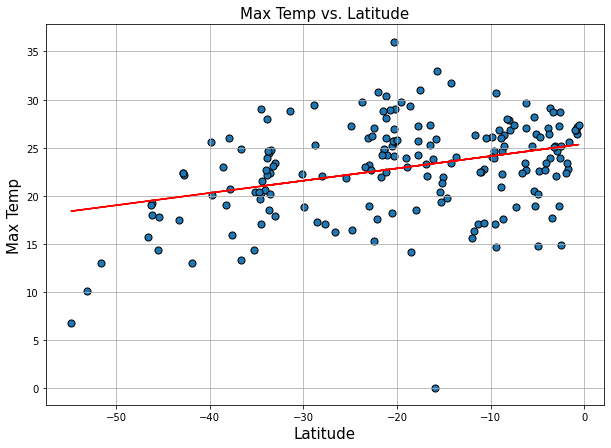

In [160]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43897229442780494
Line Equation: y = 0.49x + 54.69


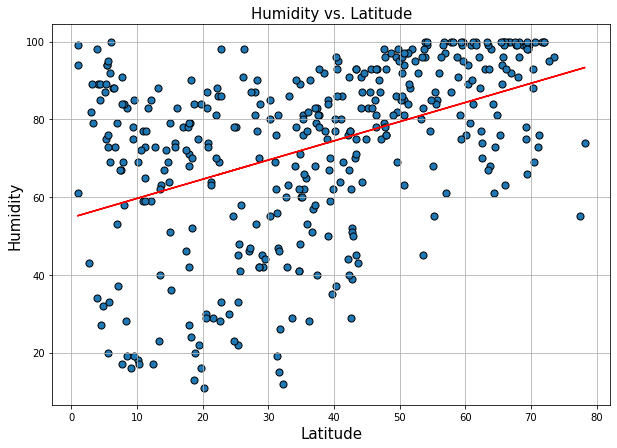

In [161]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Humidity')

The r-value is: 0.39418288167223636
Line Equation: y = 0.45x + 88.29


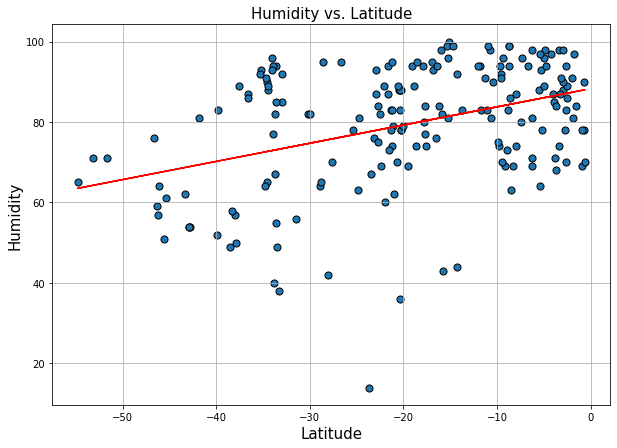

In [162]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2977389968229903
Line Equation: y = 0.58x + 42.74


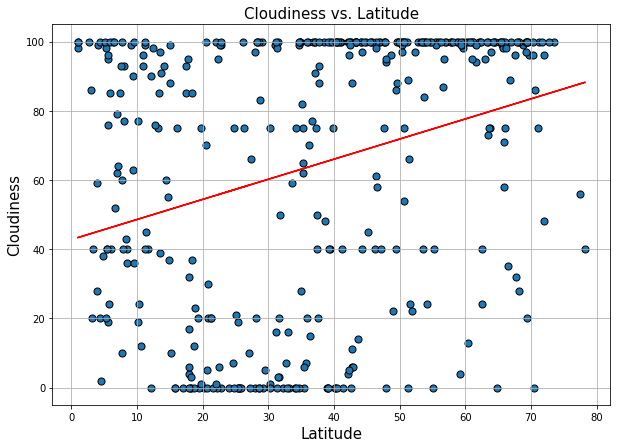

In [163]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Cloudiness')

The r-value is: 0.288058906210789
Line Equation: y = 0.81x + 78.2


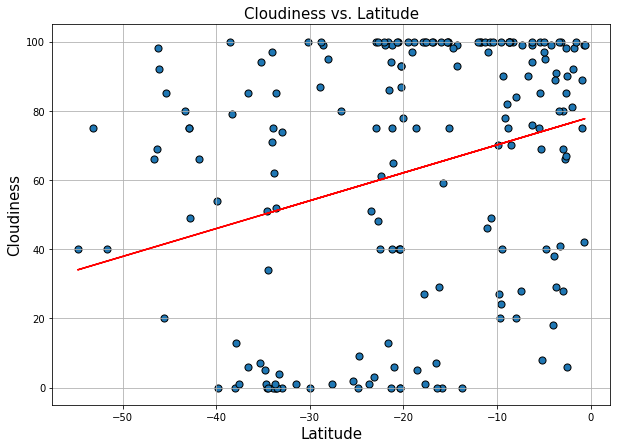

In [164]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06560257991852682
Line Equation: y = 0.01x + 2.96


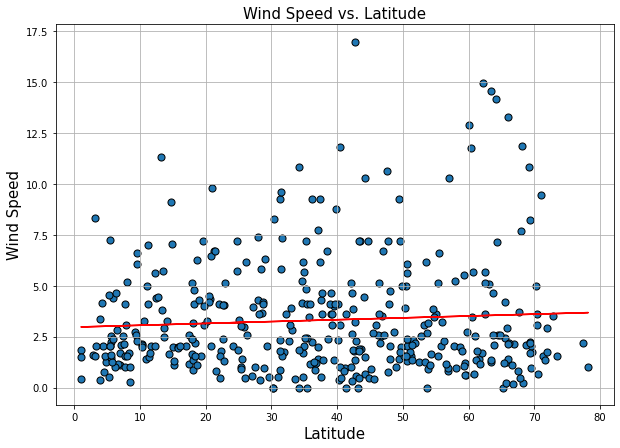

In [165]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Wind Speed')

The r-value is: -0.42797046669673944
Line Equation: y = -0.07x + 1.77


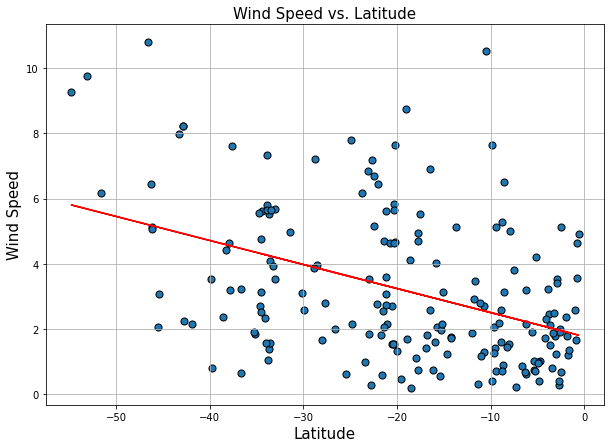

In [166]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE